# Simple Linear Regression Implementation and Comparison

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the California housing dataset
housing = pd.read_csv('housing.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
housing.head()

Dataset Preview:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# Drop categorical data
housing.drop(["ocean_proximity"], axis=1, inplace=True)

In [6]:
# Custom Simple Linear Regression Implementation

class SimpleLinearRegression:
    
    def __init__(self):
        self.intercept_ = None  # beta_0
        self.coef_ = None      # beta_1
        self.feature_name = None
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        
        # Convert to numpy arrays if they're DataFrames
        if isinstance(X, pd.DataFrame):
            self.feature_name = X.columns[0]
            X = X.values
        else:
            self.feature_name = 'feature'
            
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.values
        
        # Ensure X is 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        # Calculate means
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        
        # Calculate beta_1 (slope)
        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)
        
        self.coef_ = np.array([numerator / denominator]).flatten()  # Flatten to match sklearn's output format
        
        # Calculate beta_0 (intercept)
        self.intercept_ = y_mean - self.coef_[0] * x_mean
        
        return self
    
    def predict(self, X):
        
        if self.intercept_ is None or self.coef_ is None:
            raise Exception("Model not fitted yet. Call 'fit' before using 'predict'.")
        
        # Convert to numpy array if it's a DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        # Ensure X is 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        # Calculate predictions
        return self.intercept_ + self.coef_[0] * X.flatten()  # Flatten X for dot product
    

In [7]:
feature_name = 'median_income'

X = housing[[feature_name]]
y = housing['median_house_value']

slr = SimpleLinearRegression()
slr.fit(X, y)

# Print the results
print(f"Custom Implementation Results for feature '{feature_name}':")
print(f"Intercept (beta_0): {slr.intercept_:.4f}")
print(f"Coefficient (beta_1): {slr.coef_[0]:.4f}")

Custom Implementation Results for feature 'median_income':
Intercept (beta_0): 206855.8169
Coefficient (beta_1): -0.0000


In [8]:
# Now implement the same using sklearn
from sklearn.linear_model import LinearRegression

# Initialize and fit the sklearn linear regression model
sklearn_slr = LinearRegression()
sklearn_slr.fit(X, y)

# Print the results
print(f"\nSklearn Implementation Results for feature '{feature_name}':")
print(f"Intercept (beta_0): {sklearn_slr.intercept_:.4f}")
print(f"Coefficient (beta_1): {sklearn_slr.coef_[0]:.4f}")


Sklearn Implementation Results for feature 'median_income':
Intercept (beta_0): 45085.5767
Coefficient (beta_1): 41793.8492


In [10]:
# Compare the results
print("\nComparison of both implementations:")
print(f"{'Parameter':<20} {'Custom':<15} {'Sklearn':<15} {'Difference':<15}")
print("-" * 65)
print(f"{'Intercept (beta_0)':<20} {slr.intercept_:<15.4f} {sklearn_slr.intercept_:<15.4f} {abs(slr.intercept_ - sklearn_slr.intercept_):<15.8f}")
print(f"{'Coefficient (beta_1)':<20} {slr.coef_[0]:<15.4f} {sklearn_slr.coef_[0]:<15.4f} {abs(slr.coef_[0] - sklearn_slr.coef_[0]):<15.8f}")


Comparison of both implementations:
Parameter            Custom          Sklearn         Difference     
-----------------------------------------------------------------
Intercept (beta_0)   206855.8169     45085.5767      161770.24020565
Coefficient (beta_1) -0.0000         41793.8492      41793.84920190 


f:\College Crap\DS\CU-MSC-DS-SEM4\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


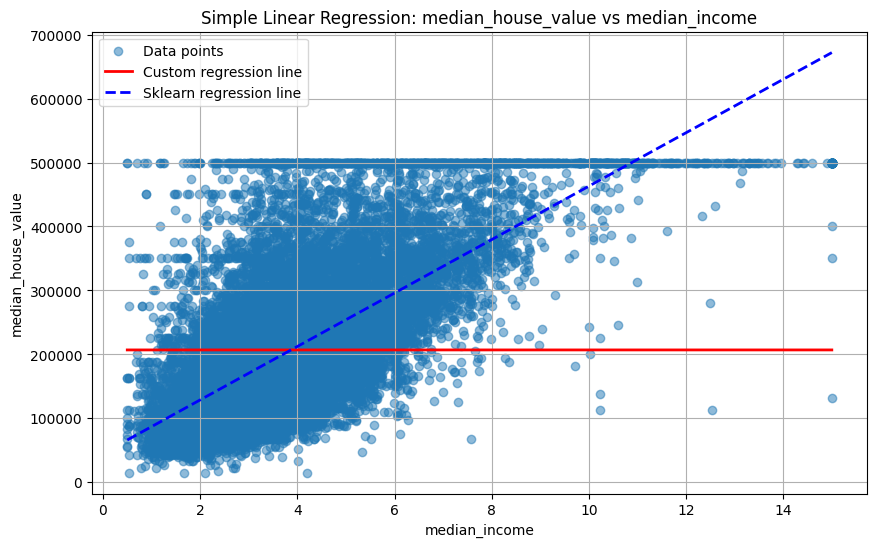

In [11]:
# Visualize the regression line
plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.scatter(X, y, alpha=0.5, label='Data points')

# Sort X for smooth line plotting
X_sorted = np.sort(X.values, axis=0)

# Custom implementation regression line
y_pred_custom = slr.predict(X_sorted)
plt.plot(X_sorted, y_pred_custom, color='red', linewidth=2, label='Custom regression line')

# Sklearn implementation regression line
y_pred_sklearn = sklearn_slr.predict(X_sorted)
plt.plot(X_sorted, y_pred_sklearn, color='blue', linewidth=2, linestyle='--', label='Sklearn regression line')

# Add labels and title
plt.xlabel(feature_name)
plt.ylabel('median_house_value')
plt.title(f'Simple Linear Regression: median_house_value vs {feature_name}')
plt.legend()
plt.grid(True)
plt.show()